In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import pathlib
import os
import numpy as np

In [65]:
def plot(lc, a, b, c, new, filename):
    fig, ax = plt.subplots(5)
    plt.suptitle('Light Curve')
    plt.xlabel('Time')
    plt.ylabel('Magnitude')
    ax[0].errorbar(lc.Time, lc.Magnitude, lc.Error, alpha=0.5, elinewidth=0.1, fmt='.', markersize=5)
    ax[1].errorbar(a.Time, a.Magnitude, a.Error, alpha=0.5, elinewidth=0.1, fmt='.', markersize=5)
    ax[2].errorbar(b.Time, b.Magnitude, b.Error, alpha=0.5, elinewidth=0.1, fmt='.', markersize=5)
    ax[3].errorbar(c.Time, c.Magnitude, c.Error, alpha=0.5, elinewidth=0.1, fmt='.', markersize=5)
    ax[4].errorbar(new.Time, new.Magnitude, new.Error, alpha=0.5, elinewidth=0.1, fmt='.', markersize=5)
    
    for ax in fig.get_axes():
        ax.label_outer()
    
    path = "C:\\Users\\grant\\OneDrive\\Desktop\\School\\Astro\\plots\\" 
    path = path + filename + '.png'
    fig.savefig(path)

In [72]:
def modelStuff(lc, filename):
    model = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.05, max_features=1.0)
    model.fit(lc)
    lc['anomaly_rf'] = pd.Series(model.predict(lc))
    rolling_mean = lc['Magnitude'].rolling(10).mean()
    rolling_std = lc['Magnitude'].rolling(10).std()
    lc['MagHigh'] = rolling_mean + (rolling_std * 2)
    lc['MagLow'] = rolling_mean - (rolling_std * 2)
    lc['anomaly_std'] = lc['Magnitude'].between(lc['MagLow'], lc['MagHigh'])
    a = lc.loc[(lc['anomaly_rf'] == -1), ['Time', 'Magnitude', 'Error']]
    b = lc.loc[(lc['anomaly_std'] == False), ['Time', 'Magnitude', 'Error']]
    c= lc.loc[(lc['anomaly_rf'] == -1) & (lc['anomaly_std'] == False), ['Time', 'Magnitude', 'Error']]
    new = lc[~lc.index.isin(a.index)]
    plot(lc, a, b, c, new, filename)
    newPath = "C:\\Users\\grant\\OneDrive\\Desktop\\School\\Astro\\new_curves\\" + "new_" + filename + ".lc"
    lc.to_csv((newPath), index=False)      

C:\Users\grant\Anaconda2\envs\Astro\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


KeyboardInterrupt: 

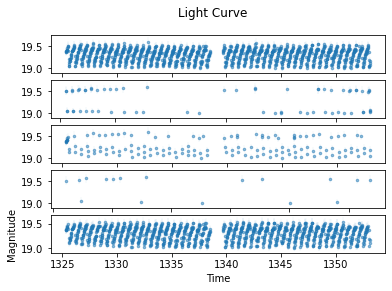

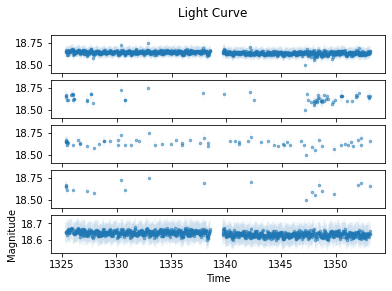

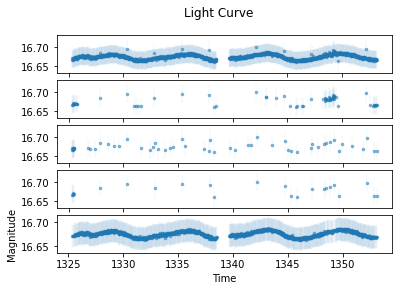

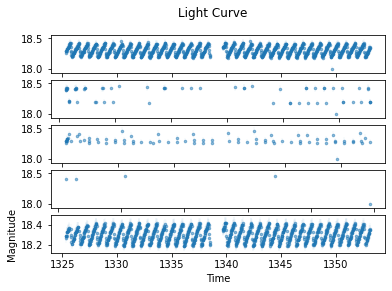

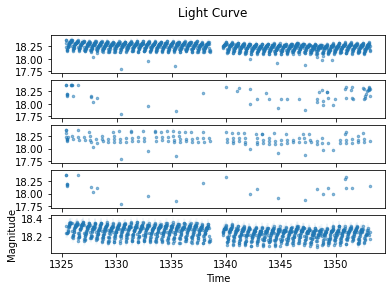

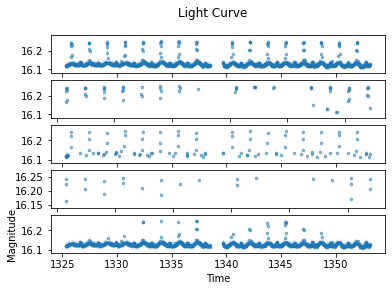

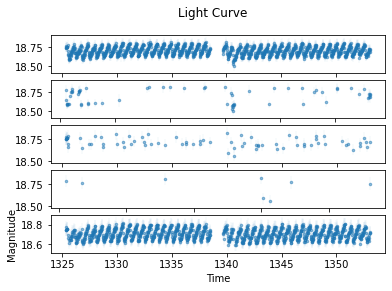

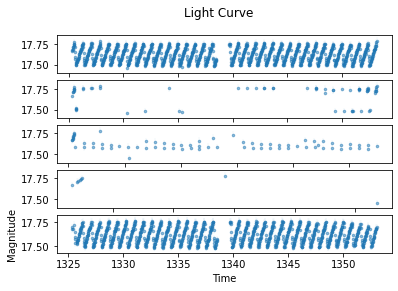

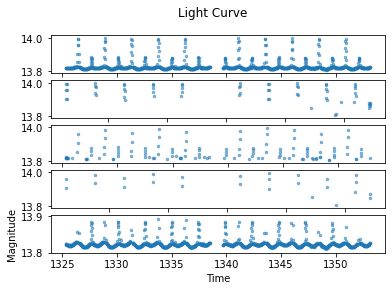

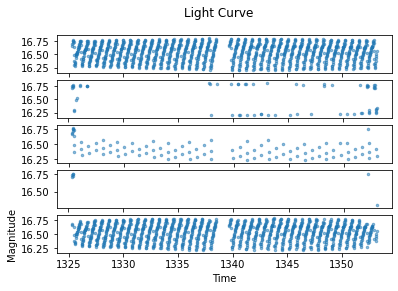

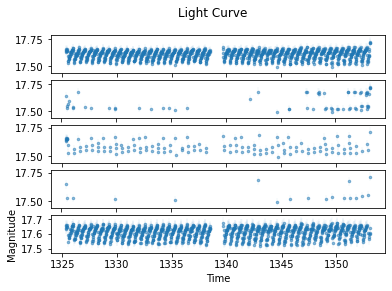

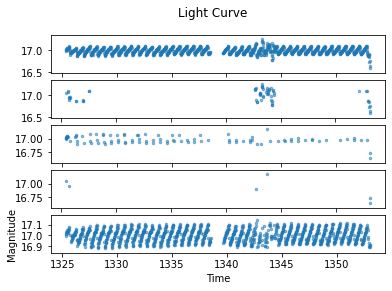

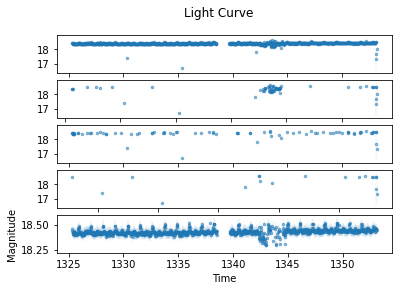

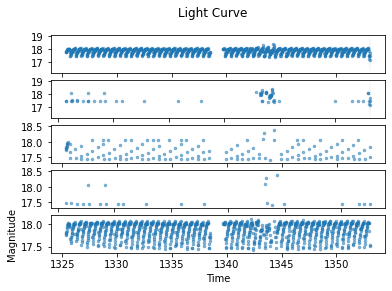

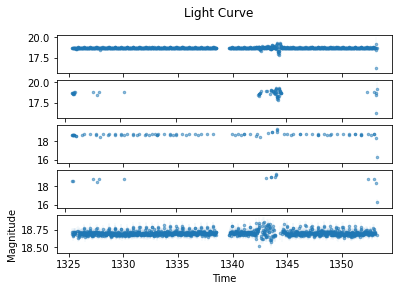

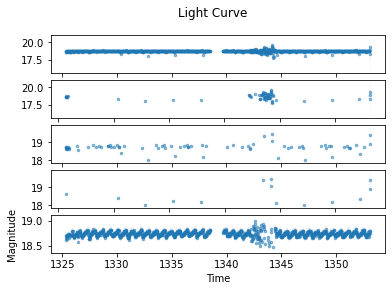

Error in callback <function flush_figures at 0x000001D6E324FC18> (for post_execute):


KeyboardInterrupt: 

In [73]:
cols=['Time', 'Magnitude', 'Error']
# path = pathlib.Path("C:\\Users\\grant\\OneDrive\\Desktop\\School\\Astro\\389475380_sector01_1_1.lc")
# lc = pd.read_csv(r"C:\\Users\\grant\\OneDrive\\Desktop\\School\\Astro\\8195216_sector01_1_1.lc", header=None, sep=" ")
# lc.columns=cols
# filename = "8195216_sector01_1_1"
# modelStuff(lc, filename)
for filename in os.listdir("C:\\Users\\grant\\OneDrive\\Desktop\\School\\Astro\\"):
    if filename.endswith(".lc"):
        path = pathlib.Path("C:\\Users\\grant\\OneDrive\\Desktop\\School\\Astro\\" + filename)
        lc = pd.read_csv(path, header=None, sep=" ")
        lc.columns=cols 
        filename = filename[:-4]
        modelStuff(lc, filename)
        
    else:
        continue